# Machine Learning ASG1, Ambrish Krishna Muralitharan, S10223486G<a id="top"></a>

## Table of Contents

### 1.	[HR Analytics](#part1)
   - [1.1 Problem Understanding](#part1.1)
       - [1.1.1 Load the Data](#part1.1.1)
       - [1.1.2 Data Exploration](#part1.1.2)
   - [1.2 Data Cleansing](#part1.2)
   - [1.4 Data Transformation](#part1.3)
   - [1.5 Exporting the Data](#part1.4)
       
       
### 1.	[AirBnB](#part1)
   - [2.1 Problem Understanding](#part2.1)
       - [2.1.1 Load the Data](#part2.1.1)
       - [2.1.2 Data Exploration](#part2.1.2)
   - [2.2 Data Cleansing](#part2.2)
   - [2.3 Exploratory Data Analysis](#part2.3)
   - [2.4 Data Transformation](#part2.4)
   - [2.5 Exporting the Data](#part2.5)


In [1]:
# import the required packages
#Basic
import pandas as pd
import numpy as np
from pprint import pprint
import requests
import math
from sklearn.metrics import precision_score

#datetime
from dateutil.relativedelta import *

# Visual
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# train&test split
from sklearn.model_selection import train_test_split

# the scaler - for standardization
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler


#for encoding of categorical variables
from feature_engine.encoding import OneHotEncoder, MeanEncoder, OrdinalEncoder

# for numerical transformation
from sklearn.preprocessing import PowerTransformer
from feature_engine.transformation import YeoJohnsonTransformer


## 1. HR Analytics

## 1.1 Problem Understanding

### 1.1.1 Load the data

In [88]:
hr_data = pd.read_csv('./hr_data.csv')
print(hr_data.shape)

(54808, 14)


In [89]:
hr_data.head()

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted  
0            0  
1            0  
2            0  
3            0  
4            0

In [90]:
hr_data['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [91]:
hr_data_1=hr_data[hr_data['is_promoted']==1]
hr_data_1.head()

employee_id         department     region         education gender  \
11        49017  Sales & Marketing   region_7        Bachelor's      f   
39        58304  Sales & Marketing  region_28        Bachelor's      m   
60        17673  Sales & Marketing   region_4  Master's & above      m   
66        77981            Finance  region_22        Bachelor's      m   
67        16502  Sales & Marketing  region_22        Bachelor's      m   

   recruitment_channel  no_of_trainings  age  previous_year_rating  \
11            sourcing                1   35                   5.0   
39            sourcing                1   33                   5.0   
60               other                1   50                   4.0   
66               other                1   27                   NaN   
67            sourcing                1   27                   NaN   

    length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
11                  3              1            0                  50   
39                  6              1            0                  51   
60                 17              1            0                  47   
66                  1              1            1                  58   
67                  1              0            0                  61   

    is_promoted  
11            1  
39            1  
60            1  
66            1  
67            1

In [92]:
hr_data_0=hr_data[hr_data['is_promoted']==0]
hr_data_0.head()

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted  
0            0  
1            0  
2            0  
3            0  
4            0

In [93]:
hr_data_0_sampled = hr_data_0.sample(n=len(hr_data_1), random_state=2).copy()
hr_data_0_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4668 entries, 6725 to 12976
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           4668 non-null   int64  
 1   department            4668 non-null   object 
 2   region                4668 non-null   object 
 3   education             4438 non-null   object 
 4   gender                4668 non-null   object 
 5   recruitment_channel   4668 non-null   object 
 6   no_of_trainings       4668 non-null   int64  
 7   age                   4668 non-null   int64  
 8   previous_year_rating  4305 non-null   float64
 9   length_of_service     4668 non-null   int64  
 10  KPIs_met >80%         4668 non-null   int64  
 11  awards_won?           4668 non-null   int64  
 12  avg_training_score    4668 non-null   int64  
 13  is_promoted           4668 non-null   int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 547.0+ KB


In [94]:
hr_data_new=pd.concat([hr_data_1,hr_data_0_sampled],axis=0)
hr_data_new['is_promoted'].value_counts()

1    4668
0    4668
Name: is_promoted, dtype: int64

In [95]:
hr_data_new.head()

employee_id         department     region         education gender  \
11        49017  Sales & Marketing   region_7        Bachelor's      f   
39        58304  Sales & Marketing  region_28        Bachelor's      m   
60        17673  Sales & Marketing   region_4  Master's & above      m   
66        77981            Finance  region_22        Bachelor's      m   
67        16502  Sales & Marketing  region_22        Bachelor's      m   

   recruitment_channel  no_of_trainings  age  previous_year_rating  \
11            sourcing                1   35                   5.0   
39            sourcing                1   33                   5.0   
60               other                1   50                   4.0   
66               other                1   27                   NaN   
67            sourcing                1   27                   NaN   

    length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
11                  3              1            0                  50   
39                  6              1            0                  51   
60                 17              1            0                  47   
66                  1              1            1                  58   
67                  1              0            0                  61   

    is_promoted  
11            1  
39            1  
60            1  
66            1  
67            1

In [96]:
hr_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9336 entries, 11 to 12976
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           9336 non-null   int64  
 1   department            9336 non-null   object 
 2   region                9336 non-null   object 
 3   education             8984 non-null   object 
 4   gender                9336 non-null   object 
 5   recruitment_channel   9336 non-null   object 
 6   no_of_trainings       9336 non-null   int64  
 7   age                   9336 non-null   int64  
 8   previous_year_rating  8634 non-null   float64
 9   length_of_service     9336 non-null   int64  
 10  KPIs_met >80%         9336 non-null   int64  
 11  awards_won?           9336 non-null   int64  
 12  avg_training_score    9336 non-null   int64  
 13  is_promoted           9336 non-null   int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 1.1+ MB


In [97]:
hr_data_new.describe()

employee_id  no_of_trainings          age  previous_year_rating  \
count   9336.000000      9336.000000  9336.000000           8634.000000   
mean   38869.959940         1.228685    34.596937              3.626940   
std    22642.619782         0.567723     7.449845              1.211617   
min       15.000000         1.000000    20.000000              1.000000   
25%    19135.500000         1.000000    29.000000              3.000000   
50%    38955.500000         1.000000    33.000000              4.000000   
75%    58222.750000         1.000000    38.000000              5.000000   
max    78292.000000         7.000000    60.000000              5.000000   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
count        9336.000000    9336.000000  9336.000000         9336.000000   
mean            5.759533       0.508569     0.066945           67.104863   
std             4.146011       0.499953     0.249940           14.569584   
min             1.000000       0.000000     0.000000           41.000000   
25%             3.000000       0.000000     0.000000           54.000000   
50%             5.000000       1.000000     0.000000           65.000000   
75%             7.000000       1.000000     0.000000           81.000000   
max            34.000000       1.000000     1.000000           99.000000   

       is_promoted  
count  9336.000000  
mean      0.500000  
std       0.500027  
min       0.000000  
25%       0.000000  
50%       0.500000  
75%       1.000000  
max       1.000000

### 1.1.2 Data Exploration

In [98]:
#Distribution of employees across various departments
hr_data_new['department'].value_counts()

Sales & Marketing    2618
Operations           2001
Technology           1347
Procurement          1304
Analytics             995
Finance               421
HR                    346
R&D                   160
Legal                 144
Name: department, dtype: int64

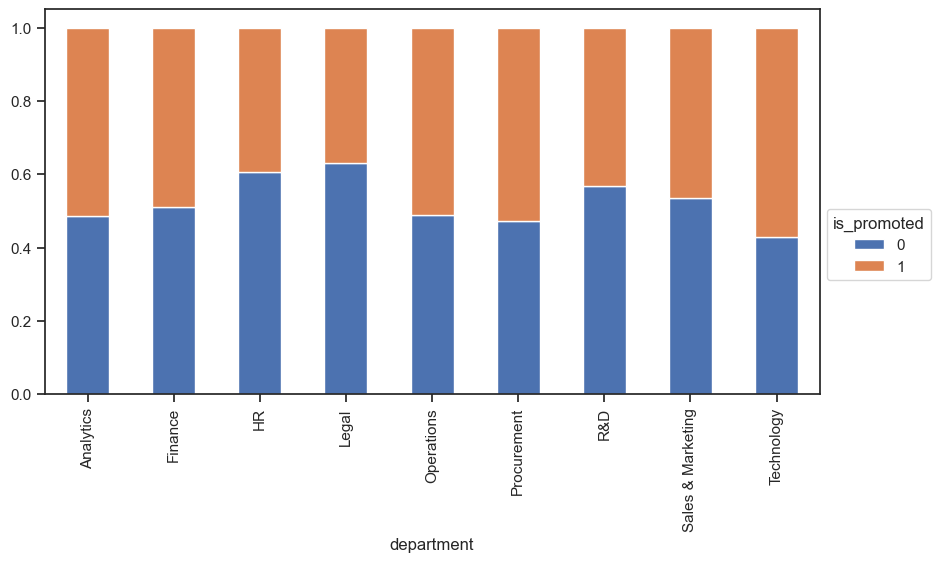

In [99]:
#Percentage of people who got promoted from each department
plt.rcParams['figure.figsize'] = [10, 5]
ct = pd.crosstab(hr_data_new.department, hr_data_new.is_promoted,normalize='index')
ct.plot.bar(stacked=True)
plt.legend(title='is_promoted',bbox_to_anchor=(1,0.5))

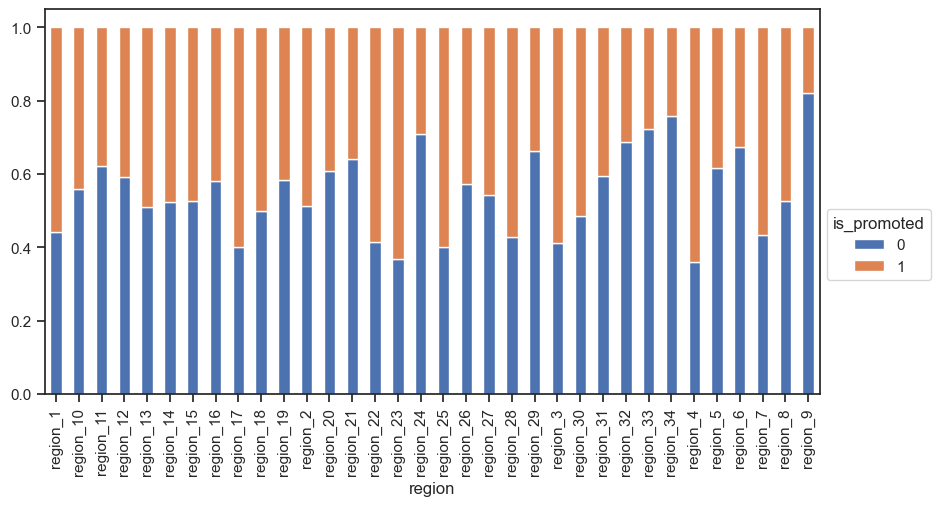

In [100]:
#Percentage of promotions across all the regions
reg = pd.crosstab(hr_data_new.region, hr_data_new.is_promoted,normalize='index')
reg.plot.bar(stacked=True)
plt.legend(title='is_promoted',bbox_to_anchor=(1,0.5))

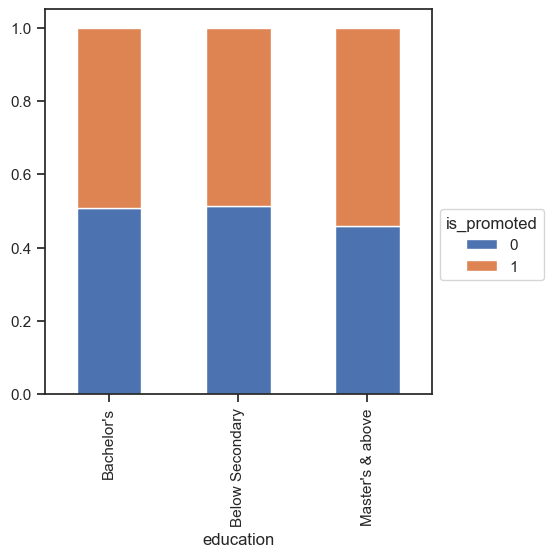

In [101]:
#Distribution of promotions among people with different Educational backgrounds
plt.rcParams['figure.figsize'] = [5, 5]
edu = pd.crosstab(hr_data_new.education, hr_data_new.is_promoted,normalize='index')
edu.plot.bar(stacked=True)
plt.rcParams['figure.figsize'] = [5, 5]
plt.legend(title='is_promoted',bbox_to_anchor=(1,0.5))

In [102]:
#Variation of promotions for each Gender
pd.crosstab(hr_data_new.gender, hr_data_new.is_promoted,normalize='index')

is_promoted         0         1
gender                         
f            0.483814  0.516186
m            0.507083  0.492917

In [103]:
#Variations of promotions based on Recruitment Channel
pd.crosstab(hr_data_new.recruitment_channel,hr_data_new.is_promoted,normalize='index')

is_promoted                 0         1
recruitment_channel                    
other                0.503978  0.496022
referred             0.415254  0.584746
sourcing             0.499873  0.500127

In [104]:
#Variation of promotions based on KPIs met
pd.crosstab(hr_data_new['KPIs_met >80%'],hr_data_new.is_promoted,normalize='index')

is_promoted           0         1
KPIs_met >80%                    
0              0.693548  0.306452
1              0.312974  0.687026

In [105]:
#Create variables for each department present
sales = hr_data_new[hr_data_new['department']=='Sales & Marketing']
operations = hr_data_new[hr_data_new['department']=='Operations']
tech = hr_data_new[hr_data_new['department']=='Technology']
hr = hr_data_new[hr_data_new['department']=='HR']
fin = hr_data_new[hr_data_new['department']=='Finance']
legal = hr_data_new[hr_data_new['department']=='Legal']
RnD = hr_data_new[hr_data_new['department']=='R&D']

In [106]:
#Comparison of Variation of Percentages between the top 3 most populated columns
#Sales and Marketing
pd.crosstab(sales.gender,sales.is_promoted,normalize='index')

is_promoted         0         1
gender                         
f            0.607143  0.392857
m            0.522120  0.477880

In [107]:
#Operations
pd.crosstab(operations.gender,operations.is_promoted,normalize='index')

is_promoted         0         1
gender                         
f            0.471924  0.528076
m            0.500859  0.499141

In [108]:
#Technology
pd.crosstab(tech.gender,tech.is_promoted,normalize='index')

is_promoted         0         1
gender                         
f            0.435845  0.564155
m            0.426402  0.573598

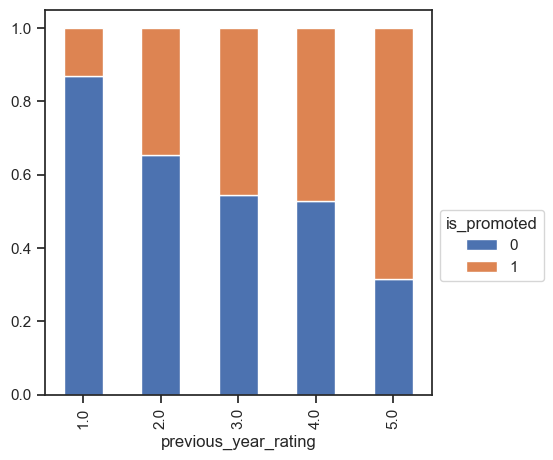

In [109]:
#Difference in Percentage of Promotions accoring to Previous Year's rating
rating = pd.crosstab(hr_data_new.previous_year_rating,hr_data_new.is_promoted,normalize='index')
rating.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

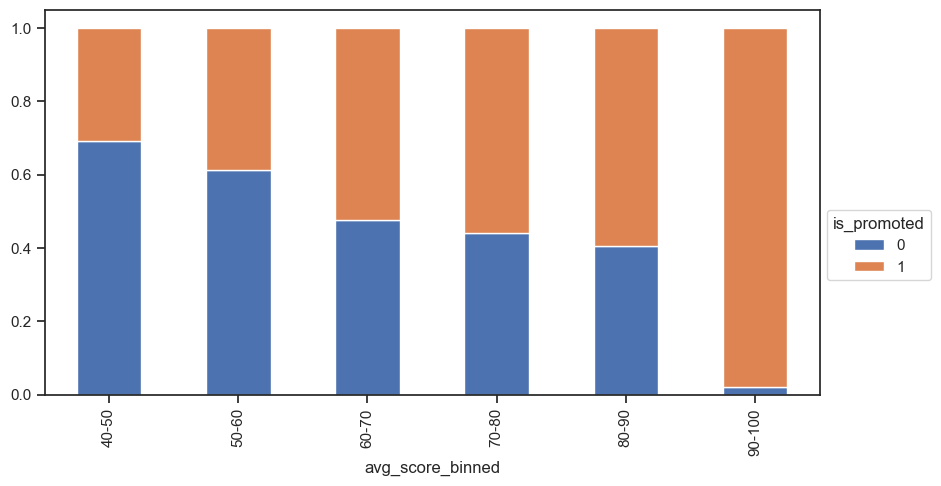

In [110]:
#Distribution of Promotion Percentage according to Average Training Score Groups
# Create bins for Training Score groups
bins = [30,40,50,60,70,80,90,100]
labels = ['30-40','40-50','50-60','60-70','70-80','80-90','90-100']
hr_data_new['avg_score_binned'] = pd.cut(hr_data_new['avg_training_score'], bins=bins, labels=labels)
hr_data_new['avg_score_binned'].value_counts()

plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(hr_data_new.avg_score_binned,hr_data_new.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

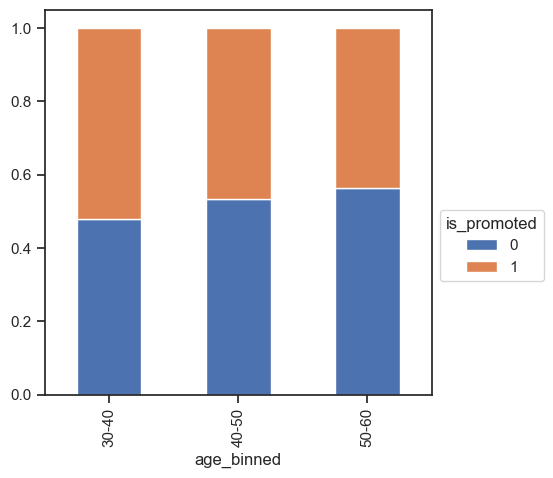

In [111]:
#Distribution of Promotion according to Age groups
#Create bins for Age groups
plt.rcParams['figure.figsize'] = [5, 5]
age_bins = [20,30,40,50,60]
age_labels = ['20-30','30-40','40-50','50-60']
hr_data_new['age_binned'] = pd.cut(hr_data_new['age'], bins=bins, labels=labels)
hr_data_new['age_binned'].value_counts()

age_bin = pd.crosstab(hr_data_new.age_binned,hr_data_new.is_promoted,normalize='index')
age_bin.plot.bar(stacked=True)
plt.rcParams['figure.figsize'] = [5, 5]
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

<AxesSubplot: xlabel='age', ylabel='avg_training_score'>

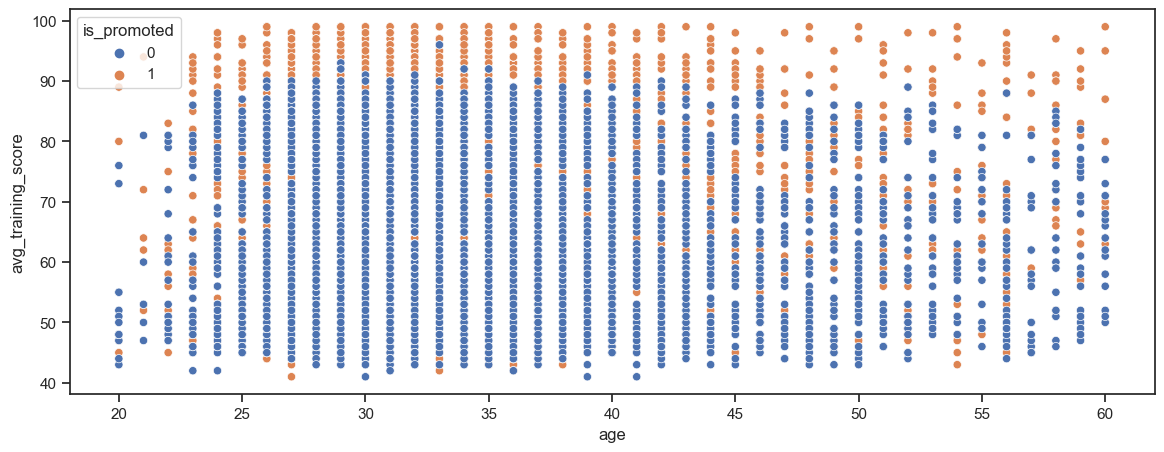

In [112]:
#Average Training Score vs Age(Colour Filtered by ispromoted column)
plt.rcParams['figure.figsize'] = [14, 5]
sns.scatterplot(x='age',y='avg_training_score',hue='is_promoted',data=hr_data_new)

In [113]:
#Mean Score of Employees with different Education Backgrounds
hr_data_new.groupby(["education"])['avg_training_score'].mean()

education
Bachelor's          67.041320
Below Secondary     68.949275
Master's & above    67.890195
Name: avg_training_score, dtype: float64

### 1.2 Cleanse and Transform the data

In [114]:
hr_data_new.isnull().any()

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
avg_score_binned        False
age_binned               True
dtype: bool

In [115]:
hr_data_new['previous_year_rating'] = hr_data_new.groupby(["KPIs_met >80%"])["previous_year_rating"].apply(lambda x: x.fillna(x.mean()))
hr_data_new["education"] = hr_data_new["education"].astype('object')
hr_data_new['education'] = hr_data_new.groupby(["department"])["education"].apply(lambda x: x.fillna(x.value_counts().index[0]))

In [116]:
#Create a copy of the data for Transfromation
hr_data_new.drop(columns = 'age_binned', inplace=True)
hr_data_encoded = hr_data_new.copy()

In [117]:
#Categorical Columns
cat_cols = [c for c in hr_data_encoded.columns if hr_data_encoded[c].dtypes=='O']
cat_cols

['department', 'region', 'education', 'gender', 'recruitment_channel']

In [118]:
# let's create the encoder

ohe_enc = OneHotEncoder(
    top_categories=None,
    drop_last=False)

In [119]:
# fit the encoder to the train set: it will learn the variables and 
# categories to encode

ohe_enc.fit(hr_data_encoded)

OneHotEncoder()

In [120]:
# we can see which variables the encoder will encode

ohe_enc.variables

In [121]:
# let's transform the data set

hr_data_encoded = ohe_enc.transform(hr_data_encoded)

In [122]:
# let's inspect the encoded dataset

hr_data_encoded.head()

employee_id  no_of_trainings  age  previous_year_rating  \
11        49017                1   35              5.000000   
39        58304                1   33              5.000000   
60        17673                1   50              4.000000   
66        77981                1   27              3.971364   
67        16502                1   27              3.269013   

    length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
11                  3              1            0                  50   
39                  6              1            0                  51   
60                 17              1            0                  47   
66                  1              1            1                  58   
67                  1              0            0                  61   

    is_promoted  department_Sales & Marketing  ...  gender_m  \
11            1                             1  ...         0   
39            1                             1  ...         1   
60            1                             1  ...         1   
66            1                             0  ...         1   
67            1                             1  ...         1   

    recruitment_channel_sourcing  recruitment_channel_other  \
11                             1                          0   
39                             1                          0   
60                             0                          1   
66                             0                          1   
67                             1                          0   

    recruitment_channel_referred  avg_score_binned_40-50  \
11                             0                       1   
39                             0                       0   
60                             0                       1   
66                             0                       0   
67                             0                       0   

    avg_score_binned_50-60  avg_score_binned_60-70  avg_score_binned_80-90  \
11                       0                       0                       0   
39                       1                       0                       0   
60                       0                       0                       0   
66                       1                       0                       0   
67                       0                       1                       0   

    avg_score_binned_70-80  avg_score_binned_90-100  
11                       0                        0  
39                       0                        0  
60                       0                        0  
66                       0                        0  
67                       0                        0  

[5 rows x 66 columns]

In [123]:
X = hr_data_encoded.drop('is_promoted',axis=1)
y = hr_data_encoded.is_promoted


In [124]:
# set up the scaler
scaler = StandardScaler()

# fit the scaler to the dataset, it will learn the parameters
scaler.fit(X)

# transform datasets
hr_data_scaling = scaler.transform(X)

In [125]:
# let's transform the returned NumPy arrays to dataframes

hr_data_scaling = pd.DataFrame(hr_data_scaling, columns=X.columns)

In [126]:
hr_data_scaling.head()

employee_id  no_of_trainings       age  previous_year_rating  \
0     0.448163        -0.402832  0.054106              1.175104   
1     0.858341        -0.402832 -0.214370              1.175104   
2    -0.936203        -0.402832  2.067679              0.319732   
3     1.727412        -0.402832 -1.019799              0.295238   
4    -0.987923        -0.402832 -1.019799             -0.305534   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0          -0.665623       0.983006    -0.267859           -1.174075   
1           0.058003       0.983006    -0.267859           -1.105435   
2           2.711297       0.983006    -0.267859           -1.379994   
3          -1.148040       0.983006     3.733310           -0.624956   
4          -1.148040      -1.017287    -0.267859           -0.419037   

   department_Sales & Marketing  department_Finance  ...  gender_m  \
0                      1.601899           -0.217310  ... -1.511625   
1                      1.601899           -0.217310  ...  0.661540   
2                      1.601899           -0.217310  ...  0.661540   
3                     -0.624259            4.601714  ...  0.661540   
4                      1.601899           -0.217310  ...  0.661540   

   recruitment_channel_sourcing  recruitment_channel_other  \
0                      1.168478                  -1.109906   
1                      1.168478                  -1.109906   
2                     -0.855814                   0.900977   
3                     -0.855814                   0.900977   
4                      1.168478                  -1.109906   

   recruitment_channel_referred  avg_score_binned_40-50  \
0                     -0.161041                2.251715   
1                     -0.161041               -0.444106   
2                     -0.161041                2.251715   
3                     -0.161041               -0.444106   
4                     -0.161041               -0.444106   

   avg_score_binned_50-60  avg_score_binned_60-70  avg_score_binned_80-90  \
0                -0.56663               -0.482663                -0.49712   
1                 1.76482               -0.482663                -0.49712   
2                -0.56663               -0.482663                -0.49712   
3                 1.76482               -0.482663                -0.49712   
4                -0.56663                2.071839                -0.49712   

   avg_score_binned_70-80  avg_score_binned_90-100  
0               -0.419484                -0.242371  
1               -0.419484                -0.242371  
2               -0.419484                -0.242371  
3               -0.419484                -0.242371  
4               -0.419484                -0.242371  

[5 rows x 65 columns]

### 1.3 Correlation Analysis

In [127]:
hr_data_scaling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9336 entries, 0 to 9335
Data columns (total 65 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   employee_id                   9336 non-null   float64
 1   no_of_trainings               9336 non-null   float64
 2   age                           9336 non-null   float64
 3   previous_year_rating          9336 non-null   float64
 4   length_of_service             9336 non-null   float64
 5   KPIs_met >80%                 9336 non-null   float64
 6   awards_won?                   9336 non-null   float64
 7   avg_training_score            9336 non-null   float64
 8   department_Sales & Marketing  9336 non-null   float64
 9   department_Finance            9336 non-null   float64
 10  department_Analytics          9336 non-null   float64
 11  department_Technology         9336 non-null   float64
 12  department_Legal              9336 non-null   float64
 13  dep

In [128]:
# This shows the correlations between the variables
hr_data_new.corr()

employee_id  no_of_trainings       age  \
employee_id              1.000000        -0.010528  0.010593   
no_of_trainings         -0.010528         1.000000 -0.073286   
age                      0.010593        -0.073286  1.000000   
previous_year_rating     0.026166        -0.056200  0.010668   
length_of_service       -0.000778        -0.042717  0.649614   
KPIs_met >80%            0.012639        -0.034267 -0.026295   
awards_won?              0.038093        -0.020329 -0.000293   
avg_training_score       0.012452         0.042947 -0.057514   
is_promoted              0.018335        -0.044717 -0.030066   

                      previous_year_rating  length_of_service  KPIs_met >80%  \
employee_id                       0.026166          -0.000778       0.012639   
no_of_trainings                  -0.056200          -0.042717      -0.034267   
age                               0.010668           0.649614      -0.026295   
previous_year_rating              1.000000          -0.005337       0.300342   
length_of_service                -0.005337           1.000000      -0.046991   
KPIs_met >80%                     0.300342          -0.046991       1.000000   
awards_won?                       0.057899          -0.056516       0.038701   
avg_training_score                0.133798          -0.035430       0.032562   
is_promoted                       0.293960          -0.010412       0.380519   

                      awards_won?  avg_training_score  is_promoted  
employee_id              0.038093            0.012452     0.018335  
no_of_trainings         -0.020329            0.042947    -0.044717  
age                     -0.000293           -0.057514    -0.030066  
previous_year_rating     0.057899            0.133798     0.293960  
length_of_service       -0.056516           -0.035430    -0.010412  
KPIs_met >80%            0.038701            0.032562     0.380519  
awards_won?              1.000000            0.177959     0.211287  
avg_training_score       0.177959            1.000000     0.289683  
is_promoted              0.211287            0.289683     1.000000

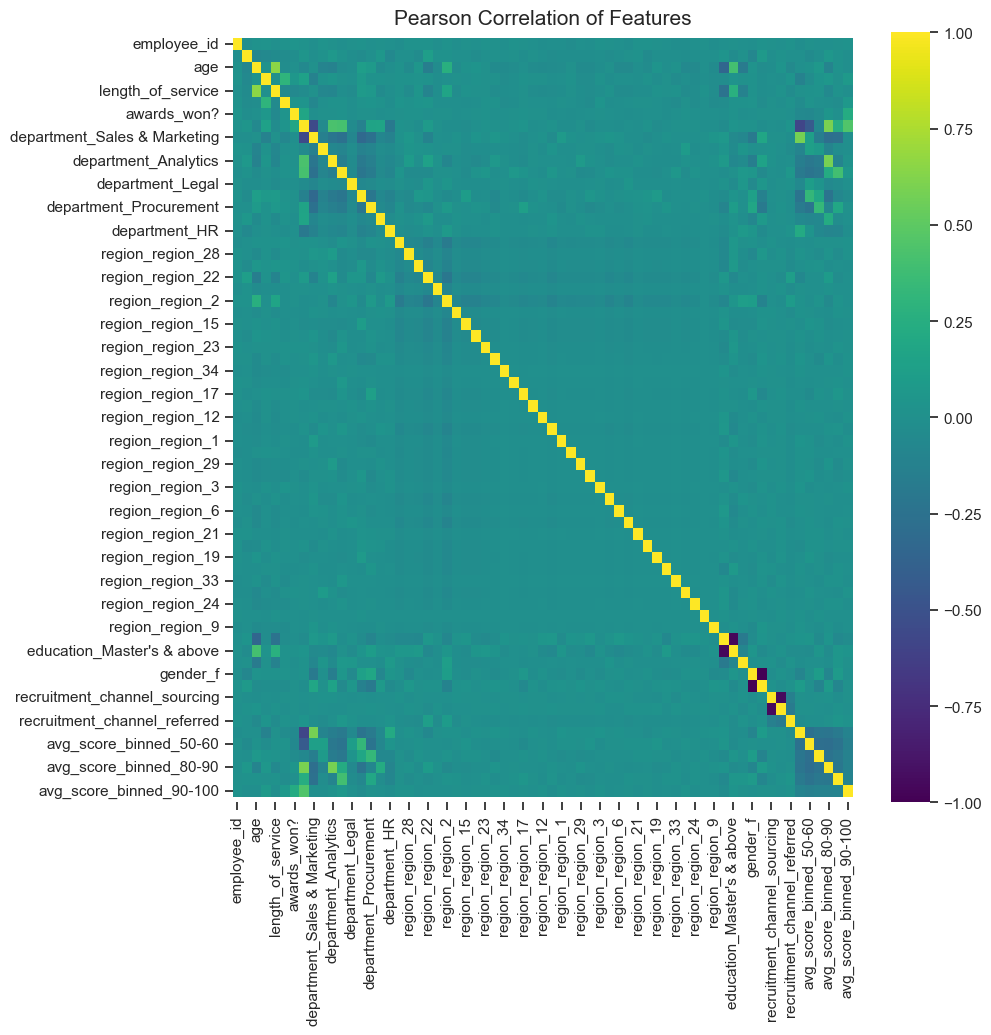

In [129]:
# Heatmap: the correlation between any two features/variables
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(hr_data_scaling.astype(float).corr(), cmap=colormap, annot=False)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

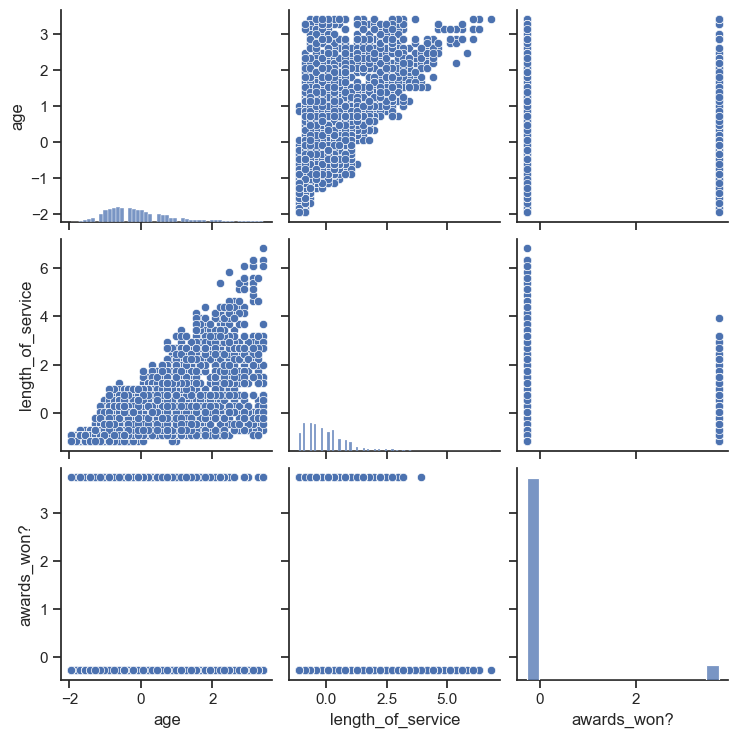

In [130]:
#scatter matrix
sns.set(style="ticks")
sns.pairplot(hr_data_scaling[['age', 'length_of_service', 'awards_won?']])

### 1.4 Export the data

In [131]:
hr_data_scaling.to_csv(r'.\hr_data_x.csv')
y.to_csv(r'.\hr_data_y.csv')

## 2. Airbnb

## 2.1 Problem Understanding

### 2.1.1 Load the data

In [2]:
listings_data = pd.read_csv('./listings.csv')
print(listings_data.shape)

(7907, 16)


In [3]:
listings_data.head()

id                                 name  host_id  host_name  \
0  49091    COZICOMFORT LONG TERM STAY ROOM 2   266763  Francesca   
1  50646      Pleasant Room along Bukit Timah   227796    Sujatha   
2  56334                          COZICOMFORT   266763  Francesca   
3  71609  Ensuite Room (Room 1 & 2) near EXPO   367042    Belinda   
4  71896      B&B  Room 1 near Airport & EXPO   367042    Belinda   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0        North Region     Woodlands   1.44255  103.79580  Private room     83   
1      Central Region   Bukit Timah   1.33235  103.78521  Private room     81   
2        North Region     Woodlands   1.44246  103.79667  Private room     69   
3         East Region      Tampines   1.34541  103.95712  Private room    206   
4         East Region      Tampines   1.34567  103.95963  Private room     94   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0             180                  1  2013-10-21               0.01   
1              90                 18  2014-12-26               0.28   
2               6                 20  2015-10-01               0.20   
3               1                 14  2019-08-11               0.15   
4               1                 22  2019-07-28               0.22   

   calculated_host_listings_count  availability_365  
0                               2               365  
1                               1               365  
2                               2               365  
3                               9               353  
4                               9               355

In [134]:
listings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

In [135]:
listings_data.describe()

id       host_id     latitude    longitude         price  \
count  7.907000e+03  7.907000e+03  7907.000000  7907.000000   7907.000000   
mean   2.338862e+07  9.114481e+07     1.314192   103.848787    169.332996   
std    1.016416e+07  8.190910e+07     0.030577     0.043675    340.187599   
min    4.909100e+04  2.366600e+04     1.243870   103.646560      0.000000   
25%    1.582180e+07  2.305808e+07     1.295795   103.835825     65.000000   
50%    2.470627e+07  6.344891e+07     1.311030   103.849410    124.000000   
75%    3.234850e+07  1.553811e+08     1.322110   103.872535    199.000000   
max    3.811276e+07  2.885676e+08     1.454590   103.973420  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count     7907.000000        7907.000000        5149.000000   
mean        17.510054          12.807386           1.043669   
std         42.094616          29.707746           1.285851   
min          1.000000           0.000000           0.010000   
25%          1.000000           0.000000           0.180000   
50%          3.000000           2.000000           0.550000   
75%         10.000000          10.000000           1.370000   
max       1000.000000         323.000000          13.000000   

       calculated_host_listings_count  availability_365  
count                     7907.000000       7907.000000  
mean                        40.607689        208.726318  
std                         65.135253        146.120034  
min                          1.000000          0.000000  
25%                          2.000000         54.000000  
50%                          9.000000        260.000000  
75%                         48.000000        355.000000  
max                        274.000000        365.000000

### 2.1.2 Explore the Data

<AxesSubplot: >

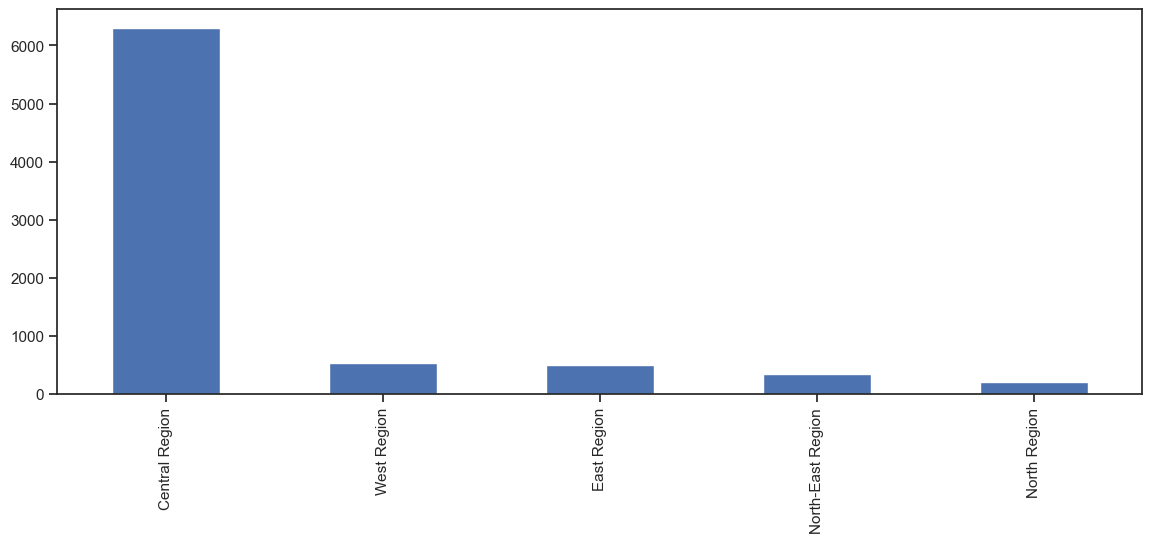

In [136]:
#Distribution of listings across various neighbourhood groups
listings_data['neighbourhood_group'].value_counts().plot.bar()

<AxesSubplot: >

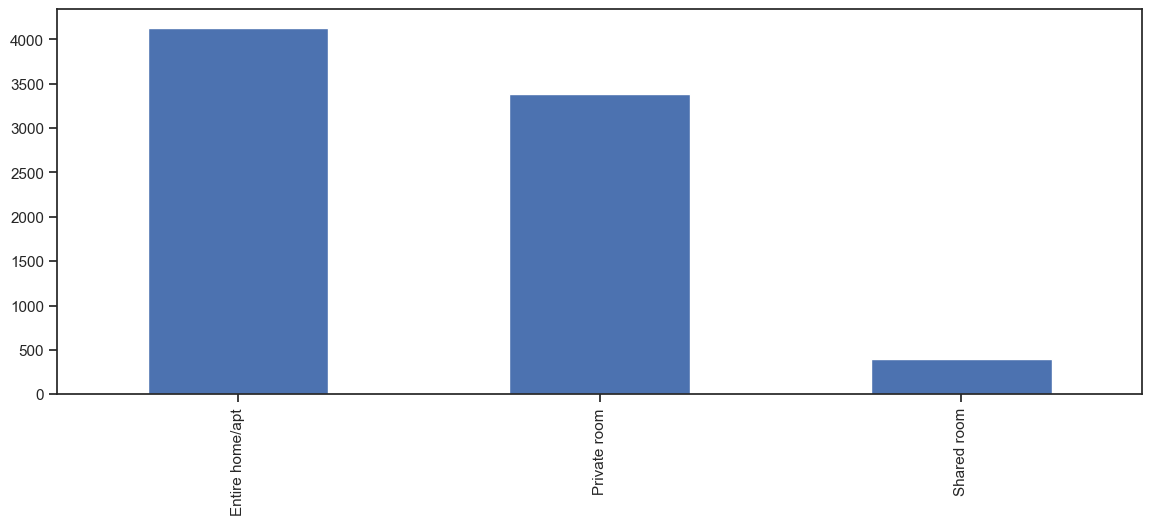

In [137]:
#Distribution of room types
listings_data['room_type'].value_counts().plot.bar()

<AxesSubplot: xlabel='host_id'>

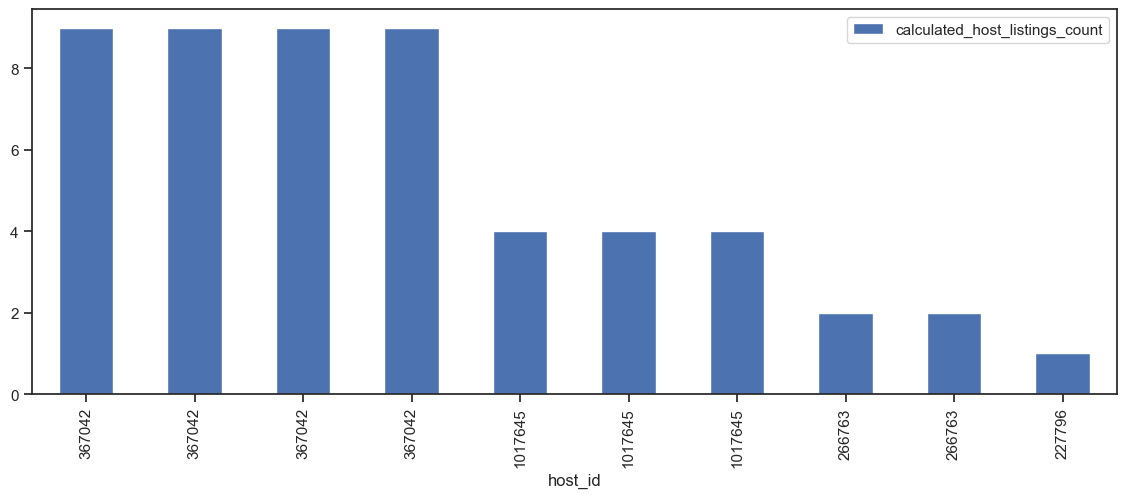

In [138]:
#Which AirBnb has the most listings?
listings_data.head(10).sort_values(by='calculated_host_listings_count',
                                   ascending = False).plot.bar(x='host_id', y='calculated_host_listings_count')

In [139]:
#Which region has the most listings and what is the proportion of each room type?
df_neighbourhood_listing = listings_data.groupby(['neighbourhood_group', 'room_type']).size().unstack(level='room_type')
df_neighbourhood_listing['total'] = df_neighbourhood_listing.sum(axis=1)
df_neighbourhood_listing = df_neighbourhood_listing.sort_values(by='total', ascending = False)
df_neighbourhood_listing

room_type            Entire home/apt  Private room  Shared room  total
neighbourhood_group                                                   
Central Region                  3738          2223          348   6309
West Region                      146           378           16    540
East Region                      131           366           11    508
North-East Region                 64           272           10    346
North Region                      53           142            9    204

<AxesSubplot: xlabel='neighbourhood_group'>

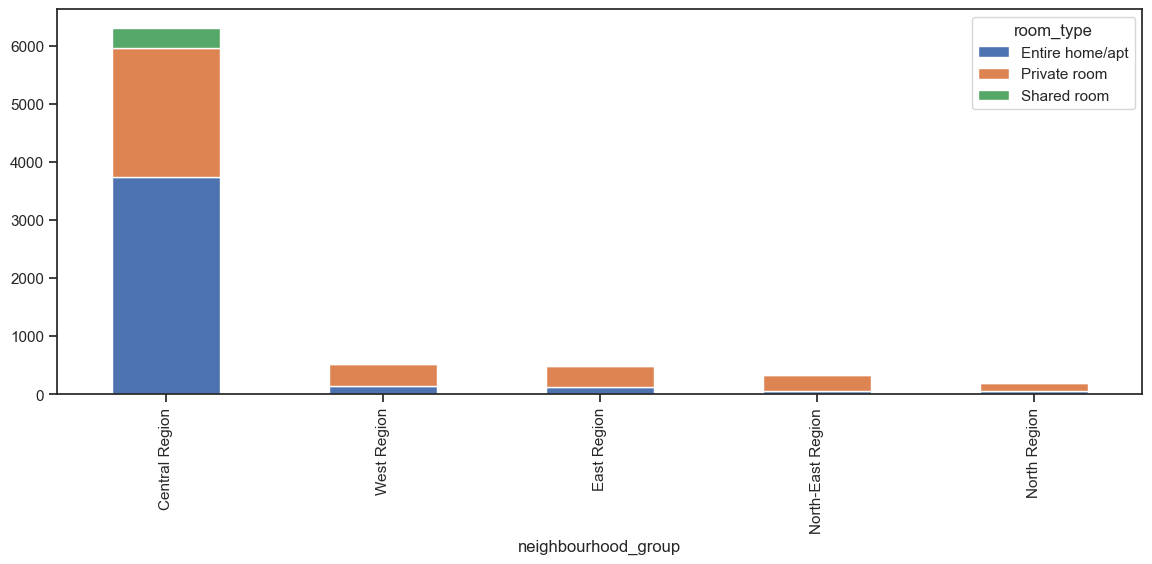

In [140]:
subplot1 = df_neighbourhood_listing.drop('total', axis =1)
subplot1.plot.bar(stacked=True)

In [141]:
#Top 10 neighbourhoods and proportion of room type?
df_neighbourhood_listing = listings_data.groupby(['neighbourhood_group','neighbourhood', 'room_type']).size().unstack(level='room_type')
df_neighbourhood_listing['total'] = df_neighbourhood_listing.sum(axis=1)
df_neighbourhood_listing = df_neighbourhood_listing.sort_values(by='total', ascending = False).head(10)
df_neighbourhood_listing

room_type                          Entire home/apt  Private room  Shared room  \
neighbourhood_group neighbourhood                                               
Central Region      Kallang                  521.0         438.0         84.0   
                    Geylang                  715.0         271.0          8.0   
                    Novena                   428.0         109.0          NaN   
                    Rochor                   279.0         189.0         68.0   
                    Outram                   166.0         244.0         67.0   
                    Bukit Merah              296.0         163.0         11.0   
                    Downtown Core            314.0         105.0          9.0   
East Region         Bedok                    106.0         261.0          6.0   
Central Region      River Valley             222.0         137.0          3.0   
                    Queenstown               129.0         119.0         18.0   

room_type                           total  
neighbourhood_group neighbourhood          
Central Region      Kallang        1043.0  
                    Geylang         994.0  
                    Novena          537.0  
                    Rochor          536.0  
                    Outram          477.0  
                    Bukit Merah     470.0  
                    Downtown Core   428.0  
East Region         Bedok           373.0  
Central Region      River Valley    362.0  
                    Queenstown      266.0

<AxesSubplot: xlabel='neighbourhood_group,neighbourhood'>

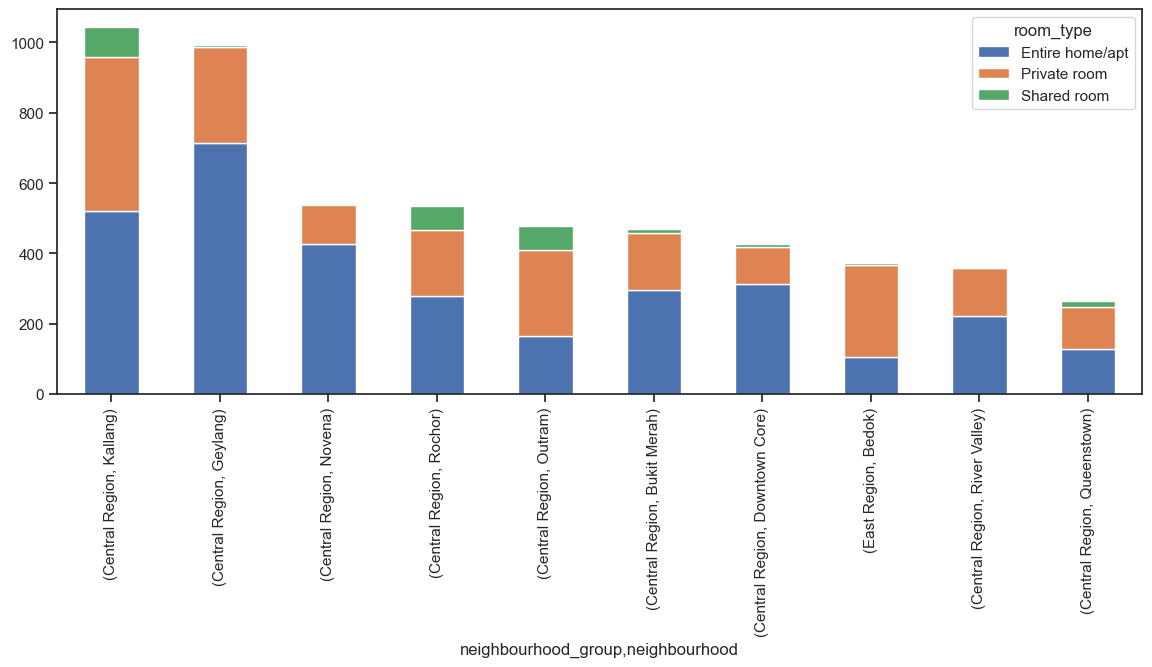

In [142]:
subplot2 = df_neighbourhood_listing.drop('total', axis =1)
subplot2.plot.bar(stacked=True)

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='price', ylabel='Density'>

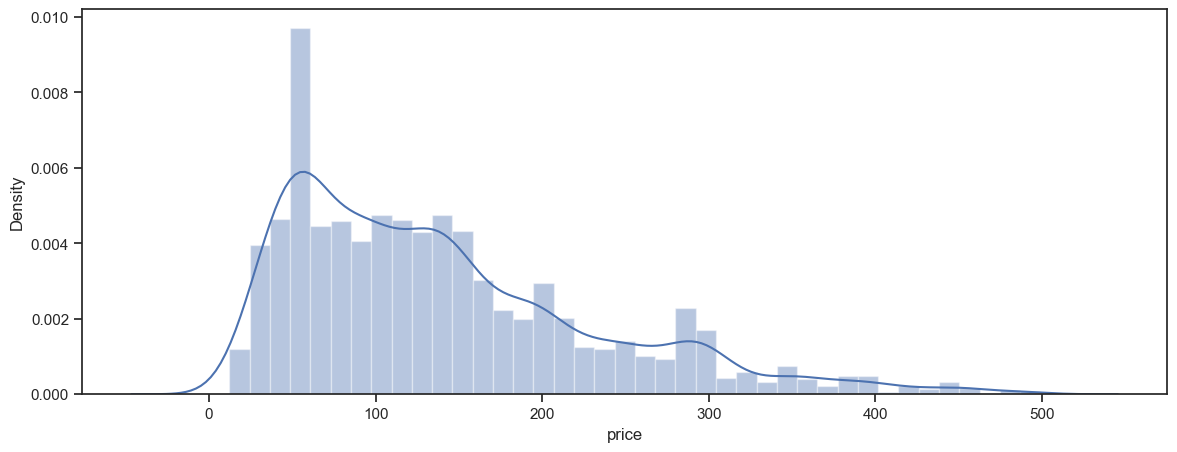

In [143]:
price_dist = listings_data[listings_data['price']<500]#Done to remove outliers
sns.distplot(price_dist['price'])

<AxesSubplot: xlabel='room_type'>

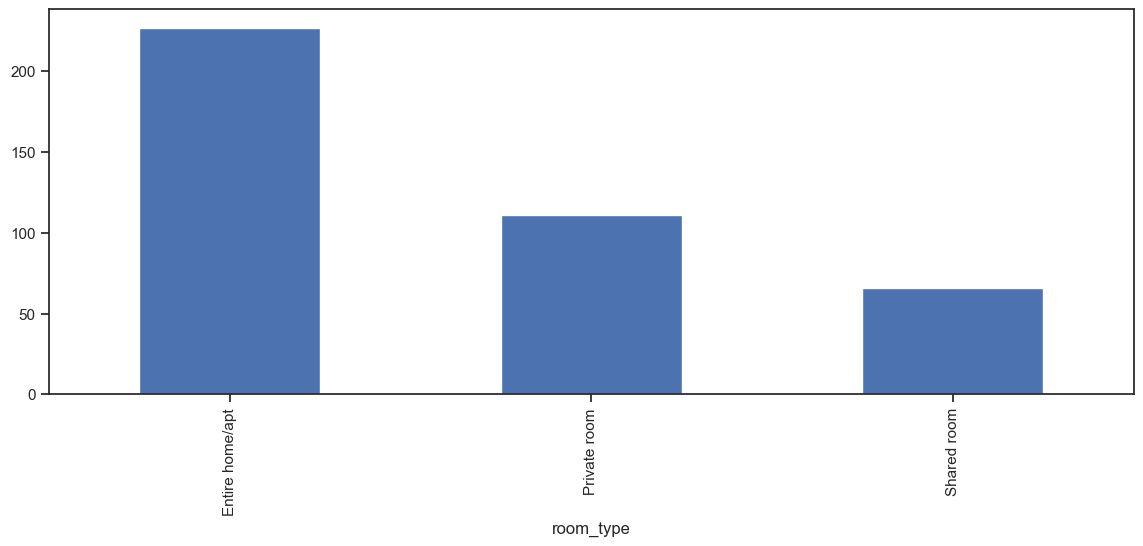

In [144]:
listings_data.groupby('room_type')['price'].mean().plot.bar()

<AxesSubplot: xlabel='room_type'>

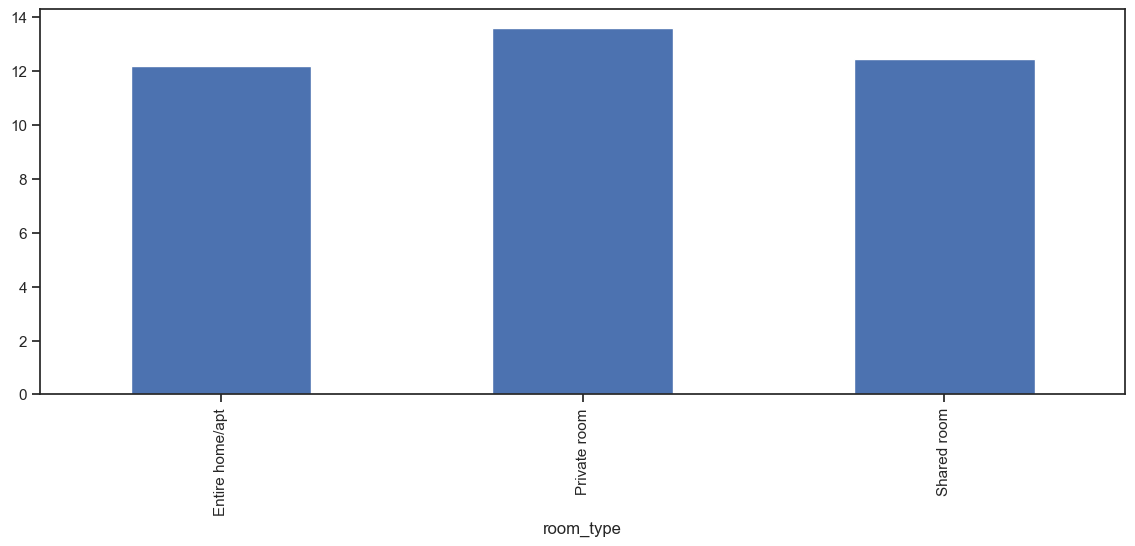

In [145]:
listings_data.groupby('room_type')['number_of_reviews'].mean().plot.bar()

<AxesSubplot: xlabel='room_type'>

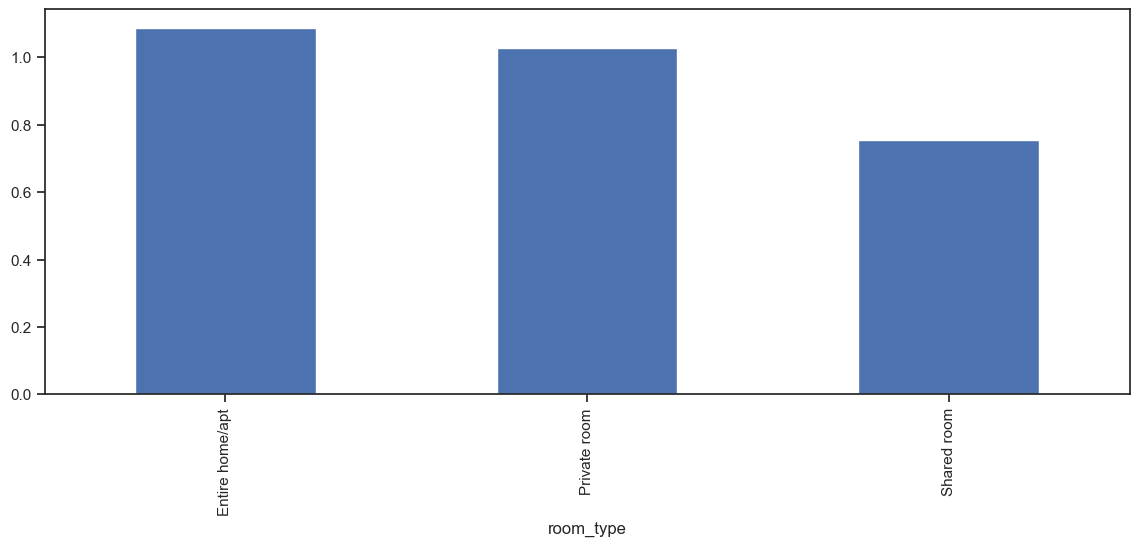

In [146]:
listings_data.groupby('room_type')['reviews_per_month'].mean().plot.bar()

room_type
False    AxesSubplot(0.125,0.11;0.775x0.77)
True     AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

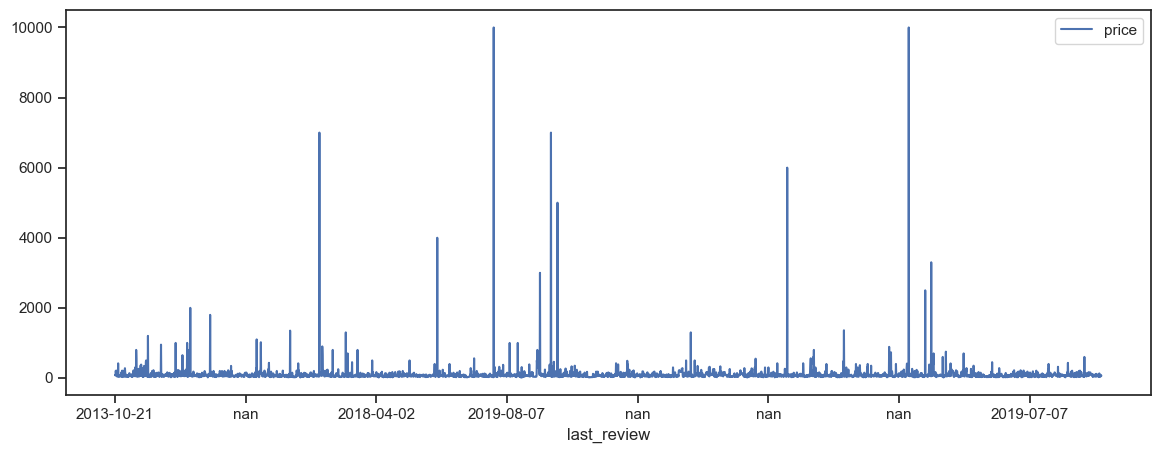

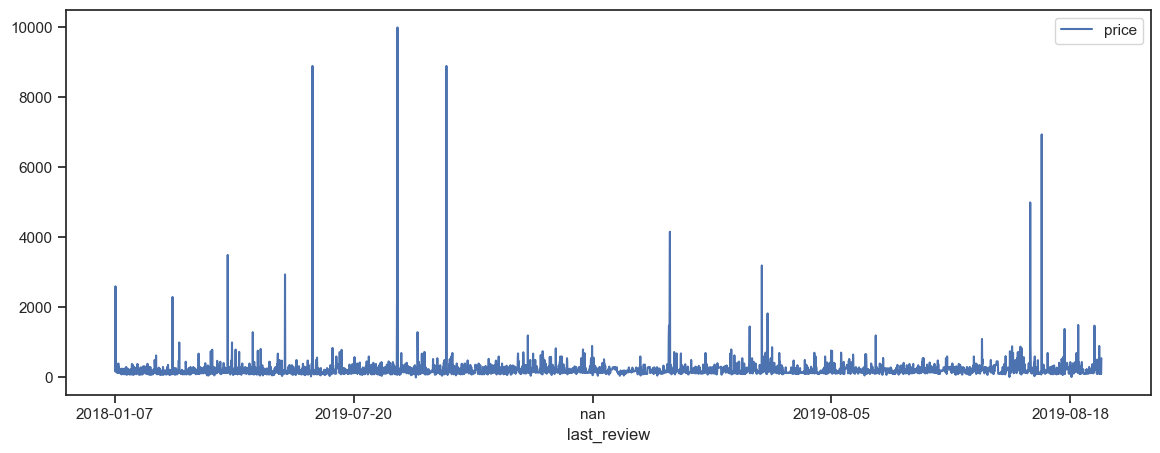

In [147]:
price_entire_home = listings_data.groupby(listings_data['room_type']=='Entire home/apt')
price_entire_home.plot(x='last_review', y='price')

In [148]:
listings_data.head()

id                                 name  host_id  host_name  \
0  49091    COZICOMFORT LONG TERM STAY ROOM 2   266763  Francesca   
1  50646      Pleasant Room along Bukit Timah   227796    Sujatha   
2  56334                          COZICOMFORT   266763  Francesca   
3  71609  Ensuite Room (Room 1 & 2) near EXPO   367042    Belinda   
4  71896      B&B  Room 1 near Airport & EXPO   367042    Belinda   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0        North Region     Woodlands   1.44255  103.79580  Private room     83   
1      Central Region   Bukit Timah   1.33235  103.78521  Private room     81   
2        North Region     Woodlands   1.44246  103.79667  Private room     69   
3         East Region      Tampines   1.34541  103.95712  Private room    206   
4         East Region      Tampines   1.34567  103.95963  Private room     94   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0             180                  1  2013-10-21               0.01   
1              90                 18  2014-12-26               0.28   
2               6                 20  2015-10-01               0.20   
3               1                 14  2019-08-11               0.15   
4               1                 22  2019-07-28               0.22   

   calculated_host_listings_count  availability_365  
0                               2               365  
1                               1               365  
2                               2               365  
3                               9               353  
4                               9               355

In [149]:
df1=listings_data[listings_data['room_type']=='Entire home/apt']
df1.head()

id                                             name  host_id  \
25  604966                Boutique 1 bedroom entiere appart  2996022   
30  746929  2 Bdrm Spacious Condo_SeaView _10 Mins to Beach  3919513   
38  804470                 Spacious Luxury Condo in Orchard   741873   
40  819034                     Boutique 2 Bedroom Apartment  1584407   
42  822413                 Ming Vase Theme - 2 BR Apartment  3951127   

       host_name neighbourhood_group  neighbourhood  latitude  longitude  \
25      Frederic      Central Region    Bukit Timah   1.33171  103.79383   
30          Jimm         East Region          Bedok   1.30792  103.92287   
38          Dara      Central Region        Tanglin   1.30292  103.82253   
40       Richard      Central Region  Marine Parade   1.30529  103.90420   
42  Sue / Mylene      Central Region        Tanglin   1.29839  103.82808   

          room_type  price  minimum_nights  number_of_reviews last_review  \
25  Entire home/apt    276               4                 11  2018-01-07   
30  Entire home/apt    176               2                 99  2019-08-24   
38  Entire home/apt   2604               1                  1  2014-02-22   
40  Entire home/apt    300               2                 37  2018-02-09   
42  Entire home/apt    200              60                  9  2018-02-12   

    reviews_per_month  calculated_host_listings_count  availability_365  
25               0.13                               1               362  
30               1.28                               1                 7  
38               0.01                               1                 0  
40               0.46                               5               221  
42               0.11                               3               334

In [150]:
listings_data_new = df1[df1['neighbourhood_group']=='Central Region']
listings_data_new.head()

id                                 name  host_id     host_name  \
25  604966    Boutique 1 bedroom entiere appart  2996022      Frederic   
38  804470     Spacious Luxury Condo in Orchard   741873          Dara   
40  819034         Boutique 2 Bedroom Apartment  1584407       Richard   
42  822413     Ming Vase Theme - 2 BR Apartment  3951127  Sue / Mylene   
49  888196  Exclusive 4 BR Penthouse with Views  4710327        Linton   

   neighbourhood_group  neighbourhood  latitude  longitude        room_type  \
25      Central Region    Bukit Timah   1.33171  103.79383  Entire home/apt   
38      Central Region        Tanglin   1.30292  103.82253  Entire home/apt   
40      Central Region  Marine Parade   1.30529  103.90420  Entire home/apt   
42      Central Region        Tanglin   1.29839  103.82808  Entire home/apt   
49      Central Region         Novena   1.31314  103.84081  Entire home/apt   

    price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
25    276               4                 11  2018-01-07               0.13   
38   2604               1                  1  2014-02-22               0.01   
40    300               2                 37  2018-02-09               0.46   
42    200              60                  9  2018-02-12               0.11   
49    243               5                 14  2016-07-05               0.19   

    calculated_host_listings_count  availability_365  
25                               1               362  
38                               1                 0  
40                               5               221  
42                               3               334  
49                               1               143

### 2.2 Cleanse and Transform the data

In [151]:
listings_data_new.isnull().any()

id                                False
name                              False
host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [152]:
listings_data_new = listings_data_new.drop(['last_review','reviews_per_month','latitude', 'longitude'], axis = 1)

In [153]:
listings_data_new.isnull().any()

id                                False
name                              False
host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [154]:
# plot histogram and Q-Q plots to have a look at the variable distribution

def diagnostic_plots(df, variable):
    
    # function to plot a histogram, Q-Q plot and box-plot
    # side by side, for a certain variable
    
    #define figure size
    plt.figure(figsize=(16,4))
    
    #histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins =30)
    plt.title('Histogram')
    
    #Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title('Q-Q Plot')
    
    #boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y = df[variable])
    plt.title('Boxplot')
    

    plt.show()

In [155]:
#Numerical Columns
num_cols = [c for c in listings_data_new.columns if listings_data_new[c].dtypes!='O']
num_cols

['id',
 'host_id',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'calculated_host_listings_count',
 'availability_365']

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


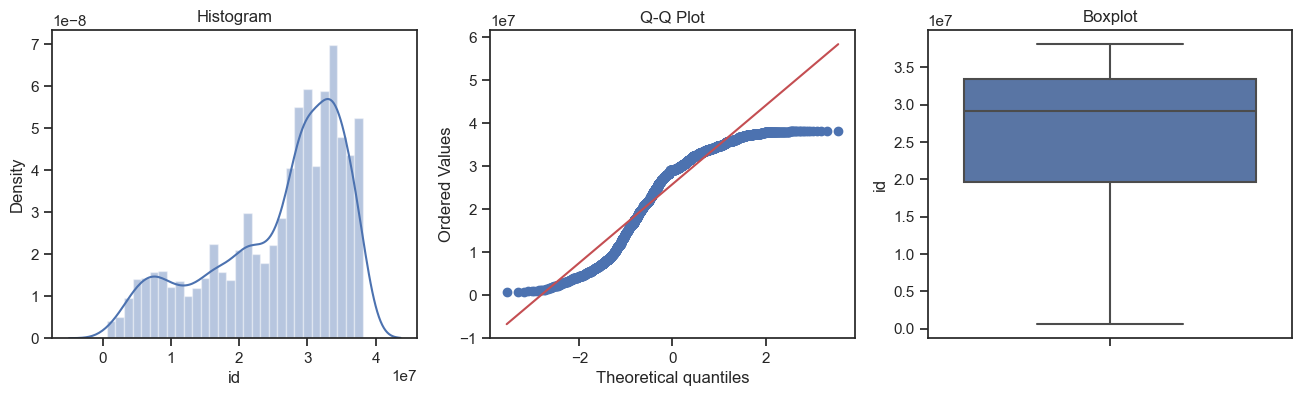

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


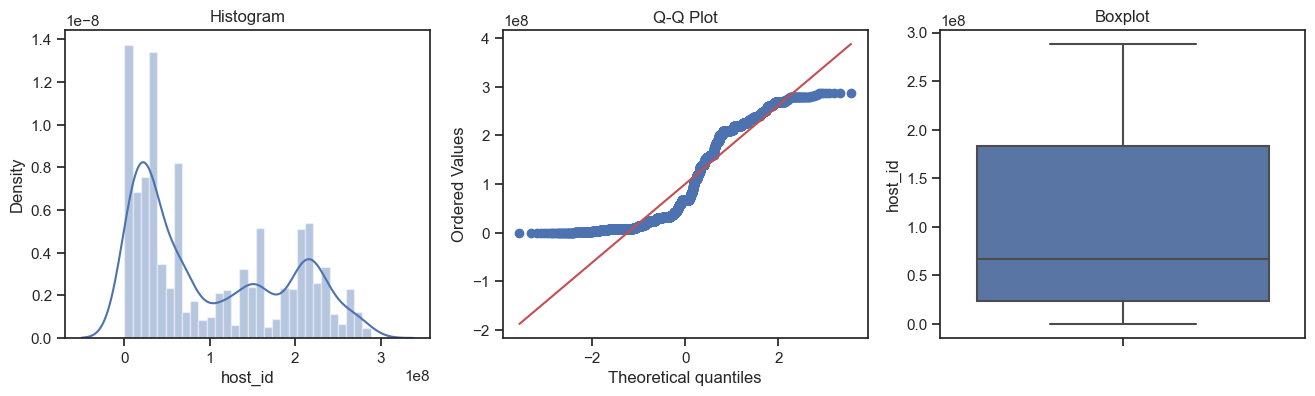

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


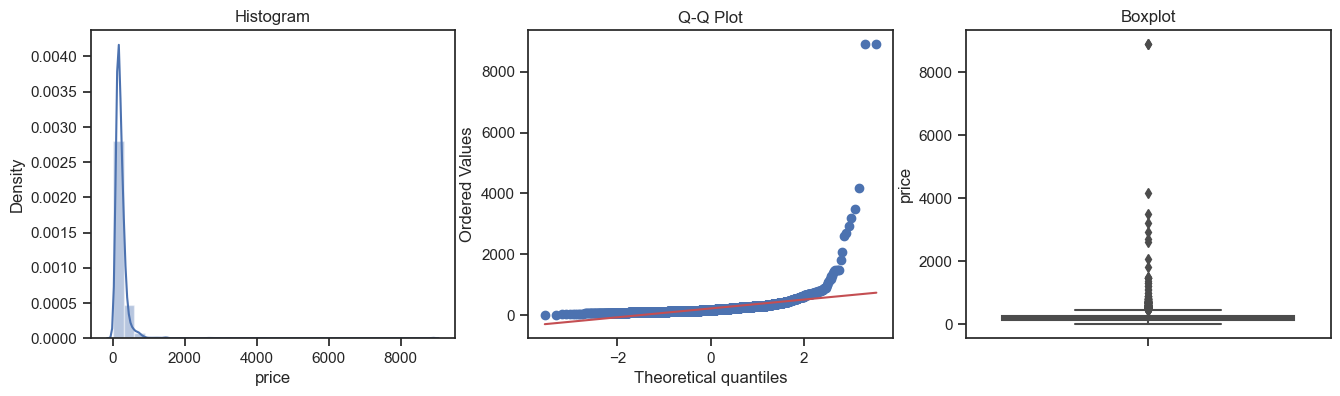

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


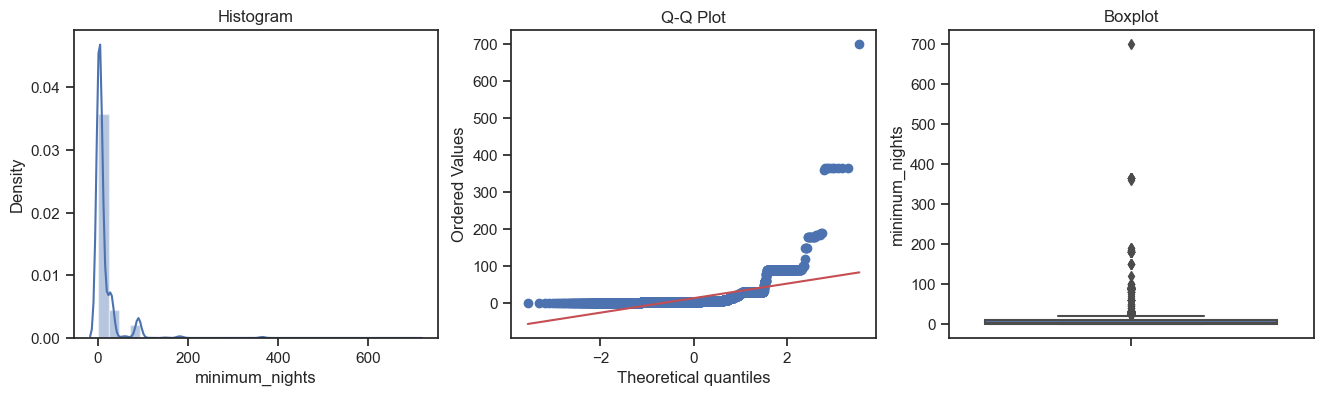

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


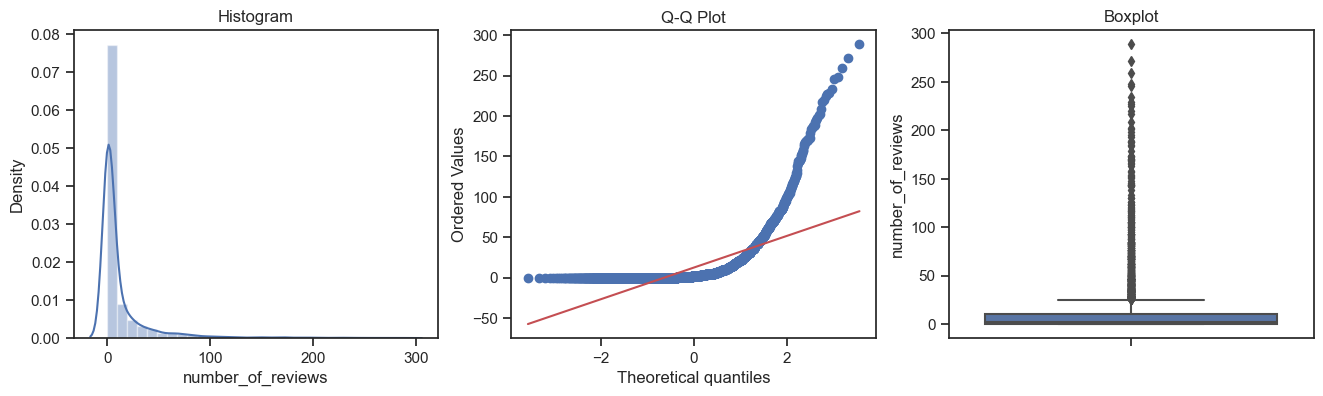

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


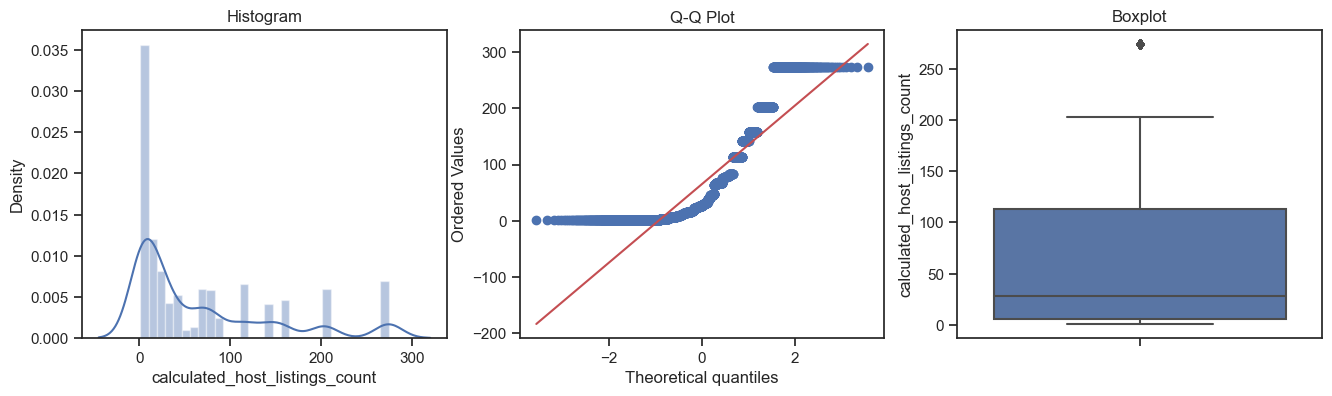

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


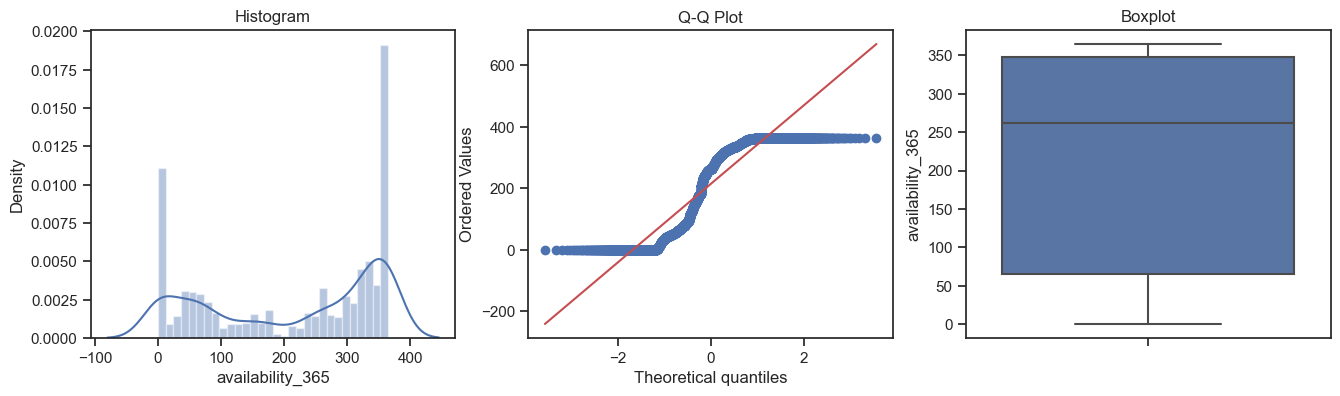

In [156]:
# check original distribution

for i in num_cols:
    diagnostic_plots(listings_data_new, i)

In [157]:
# initialize the transformer with a subset of variables to transform
yjt = YeoJohnsonTransformer(variables = num_cols)

# fit transformer to the dataframe
yjt.fit(listings_data_new)

YeoJohnsonTransformer(variables=['id', 'host_id', 'price', 'minimum_nights',
                                 'number_of_reviews',
                                 'calculated_host_listings_count',
                                 'availability_365'])

In [158]:
# transform indicated variables

listings_data_new = yjt.transform(listings_data_new)

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


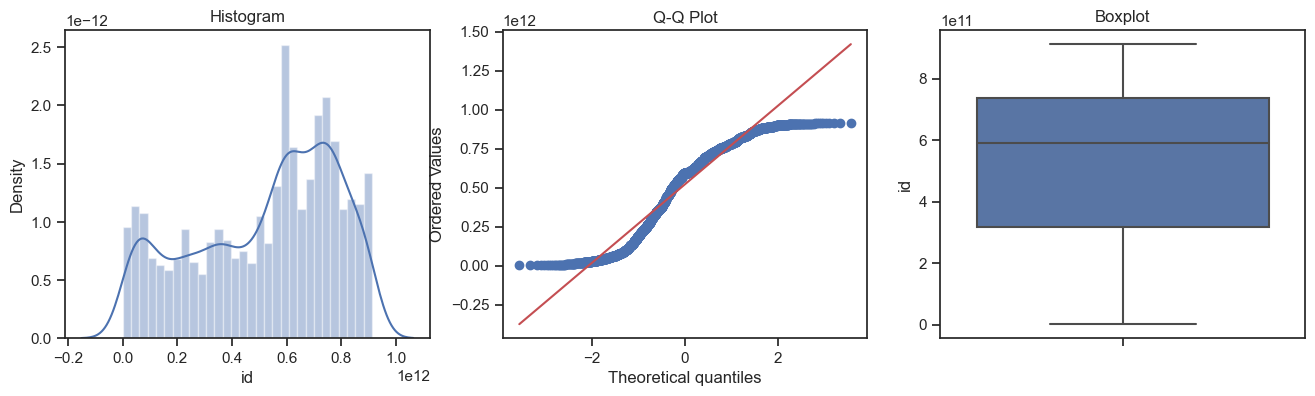

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


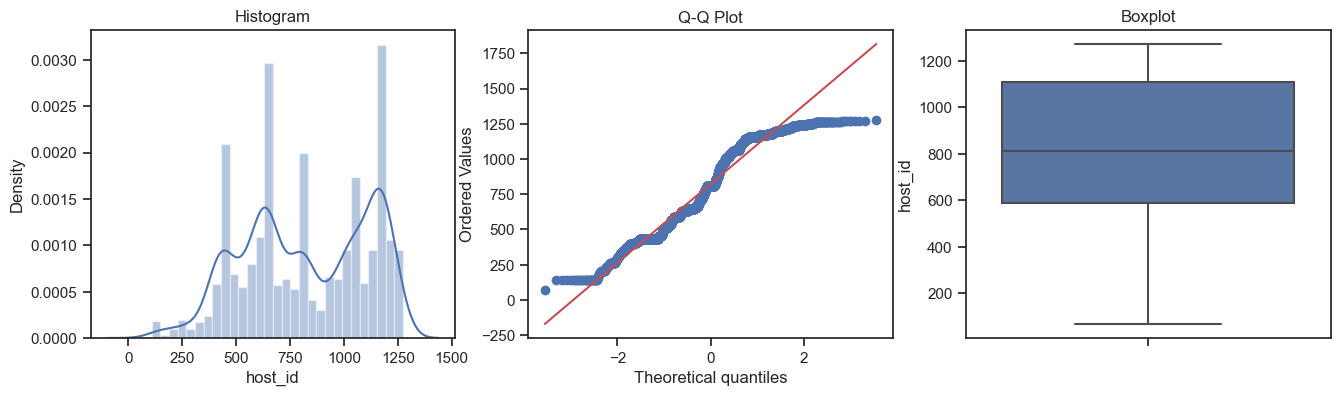

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


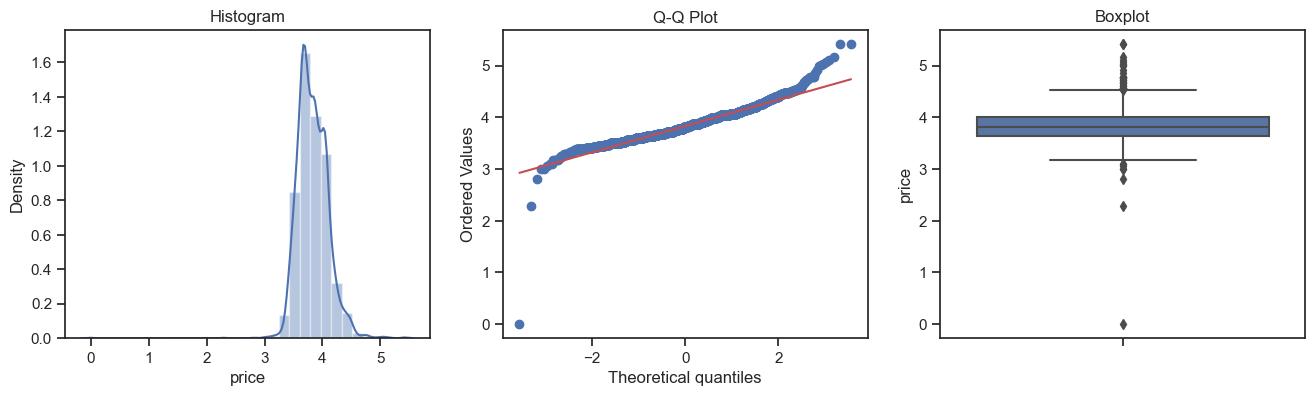

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


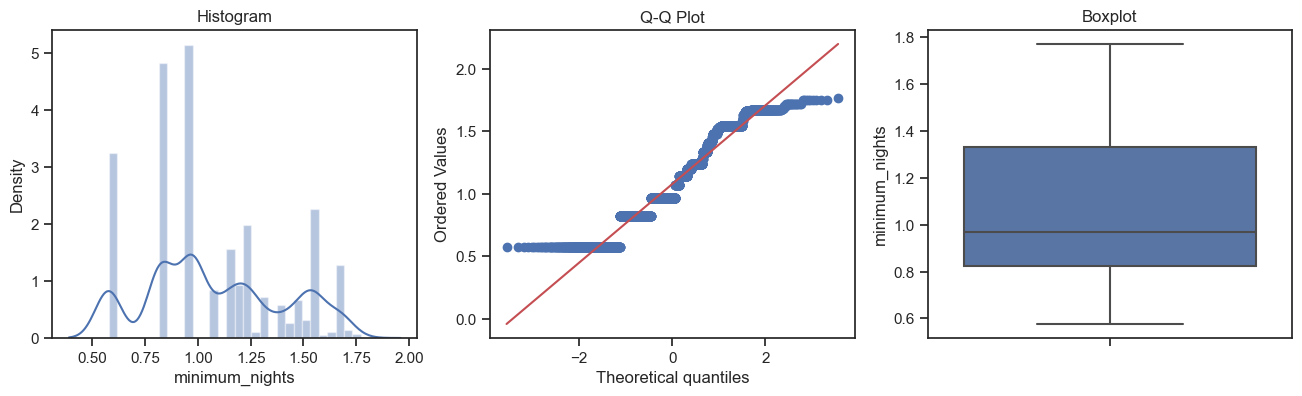

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


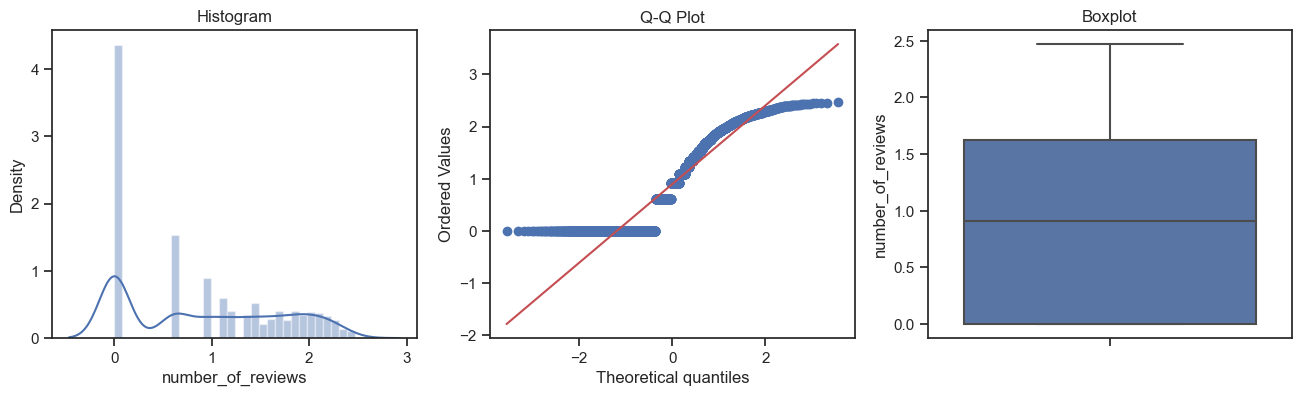

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


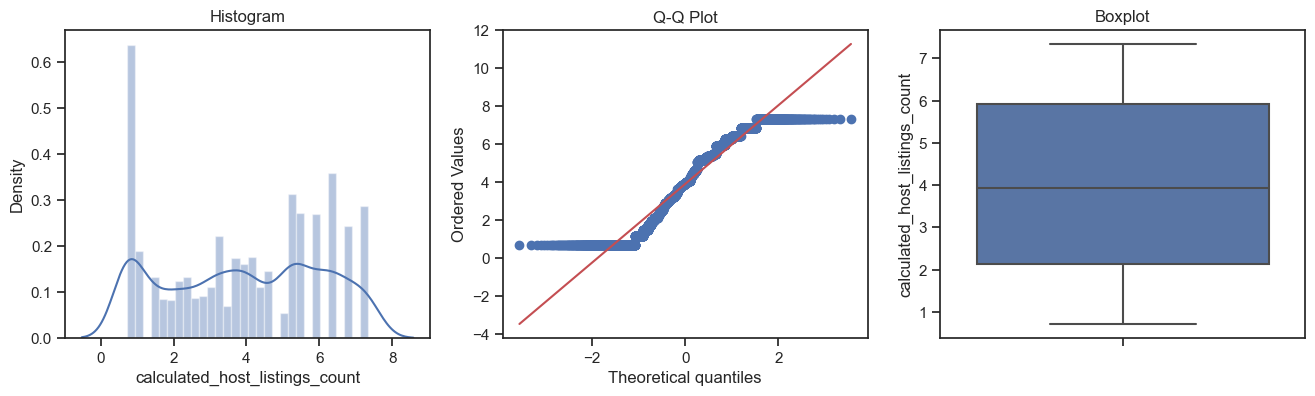

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


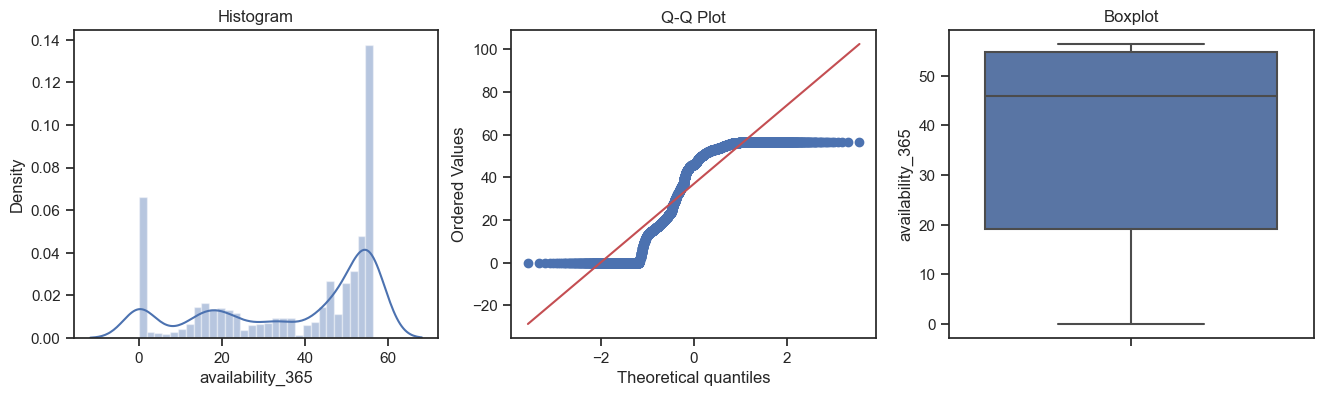

In [159]:
# check new distribution

for i in num_cols:
    diagnostic_plots(listings_data_new, i)

In [160]:
listings_data_new.head()

id                                 name     host_id  \
25  1.181976e+09    Boutique 1 bedroom entiere appart  311.729160   
38  1.867401e+09     Spacious Luxury Condo in Orchard  202.105669   
40  1.921947e+09         Boutique 2 Bedroom Apartment  255.865911   
42  1.934687e+09     Ming Vase Theme - 2 BR Apartment  339.604141   
49  2.188962e+09  Exclusive 4 BR Penthouse with Views  358.576574   

       host_name neighbourhood_group  neighbourhood        room_type  \
25      Frederic      Central Region    Bukit Timah  Entire home/apt   
38          Dara      Central Region        Tanglin  Entire home/apt   
40       Richard      Central Region  Marine Parade  Entire home/apt   
42  Sue / Mylene      Central Region        Tanglin  Entire home/apt   
49        Linton      Central Region         Novena  Entire home/apt   

       price  minimum_nights  number_of_reviews  \
25  4.030390        1.068678           1.661821   
38  4.992421        0.576516           0.615708   
40  4.071112        0.824973           2.060690   
42  3.869159        1.630847           1.582709   
49  3.967397        1.140384           1.752042   

    calculated_host_listings_count  availability_365  
25                        0.715611         56.142885  
38                        0.715611          0.000000  
40                        1.947080         41.326572  
42                        1.478101         53.414853  
49                        0.715611         31.461632

In [161]:
#Create a copy of the dataset
listings_data_encoded = listings_data_new.copy()

In [162]:
#Categorical Columns
cat_cols = [c for c in listings_data_encoded.columns if listings_data_encoded[c].dtypes=='O']
cat_cols

['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']

In [163]:
# let's create the encoder

ohe_enc = OneHotEncoder(
    top_categories=None,
    drop_last=False)

In [164]:
# fit the encoder to the train set: it will learn the variables and 
# categories to encode

ohe_enc.fit(listings_data_encoded)

OneHotEncoder()

In [165]:
#Transform the dataset
listings_data_encoded = ohe_enc.transform(listings_data_encoded)

C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This

C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This

C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This

C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This

C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This

C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This

C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This

C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This

C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This

C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This

C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This

C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This

C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This

C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This

C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This

C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This

C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This

C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This

C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This

C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This

C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This

C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This

C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This

C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This

C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\ambkr\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This

In [166]:
listings_data_encoded.head()

id     host_id     price  minimum_nights  number_of_reviews  \
25  1.181976e+09  311.729160  4.030390        1.068678           1.661821   
38  1.867401e+09  202.105669  4.992421        0.576516           0.615708   
40  1.921947e+09  255.865911  4.071112        0.824973           2.060690   
42  1.934687e+09  339.604141  3.869159        1.630847           1.582709   
49  2.188962e+09  358.576574  3.967397        1.140384           1.752042   

    calculated_host_listings_count  availability_365  \
25                        0.715611         56.142885   
38                        0.715611          0.000000   
40                        1.947080         41.326572   
42                        1.478101         53.414853   
49                        0.715611         31.461632   

    name_Boutique 1 bedroom entiere appart  \
25                                       1   
38                                       0   
40                                       0   
42                                       0   
49                                       0   

    name_Spacious Luxury Condo in Orchard  name_Boutique 2 Bedroom Apartment  \
25                                      0                                  0   
38                                      1                                  0   
40                                      0                                  1   
42                                      0                                  0   
49                                      0                                  0   

    ...  neighbourhood_Museum  neighbourhood_Toa Payoh  neighbourhood_Outram  \
25  ...                     0                        0                     0   
38  ...                     0                        0                     0   
40  ...                     0                        0                     0   
42  ...                     0                        0                     0   
49  ...                     0                        0                     0   

    neighbourhood_Bukit Merah  neighbourhood_Newton  neighbourhood_Rochor  \
25                          0                     0                     0   
38                          0                     0                     0   
40                          0                     0                     0   
42                          0                     0                     0   
49                          0                     0                     0   

    neighbourhood_Queenstown  neighbourhood_Bishan  \
25                         0                     0   
38                         0                     0   
40                         0                     0   
42                         0                     0   
49                         0                     0   

    neighbourhood_Southern Islands  room_type_Entire home/apt  
25                               0                          1  
38                               0                          1  
40                               0                          1  
42                               0                          1  
49                               0                          1  

[5 rows x 4127 columns]

In [167]:
listing_X = listings_data_encoded.drop('price',axis=1)
listing_y = listings_data_encoded.price

In [168]:
# set up the scaler
scaler = StandardScaler()

# fit the scaler to the data set, it will learn the parameters
scaler.fit(listing_X)

# transform data sets
listings_data_scaled = scaler.transform(listing_X)

In [169]:
# let's transform the returned NumPy arrays to dataframes

listings_data_scaled= pd.DataFrame(listings_data_scaled, columns=listing_X.columns)

In [170]:
listings_data_scaled.head()

id   host_id  minimum_nights  number_of_reviews  \
0 -2.000504 -1.778998       -0.034353           0.946874   
1 -1.997871 -2.160449       -1.551751          -0.348451   
2 -1.997661 -1.973383       -0.785726           1.440765   
3 -1.997612 -1.682003        1.698886           0.848916   
4 -1.996635 -1.615985        0.186727           1.058589   

   calculated_host_listings_count  availability_365  \
0                       -1.495446          0.953208   
1                       -1.495446         -1.825017   
2                       -0.919154          0.220024   
3                       -1.138623          0.818212   
4                       -1.495446         -0.268141   

   name_Boutique 1 bedroom entiere appart  \
0                               61.131007   
1                               -0.016358   
2                               -0.016358   
3                               -0.016358   
4                               -0.016358   

   name_Spacious Luxury Condo in Orchard  name_Boutique 2 Bedroom Apartment  \
0                              -0.016358                          -0.016358   
1                              61.131007                          -0.016358   
2                              -0.016358                          61.131007   
3                              -0.016358                          -0.016358   
4                              -0.016358                          -0.016358   

   name_Ming Vase Theme - 2 BR Apartment  ...  neighbourhood_Museum  \
0                              -0.016358  ...             -0.111622   
1                              -0.016358  ...             -0.111622   
2                              -0.016358  ...             -0.111622   
3                              61.131007  ...             -0.111622   
4                              -0.016358  ...             -0.111622   

   neighbourhood_Toa Payoh  neighbourhood_Outram  neighbourhood_Bukit Merah  \
0                -0.112844             -0.215575                  -0.293252   
1                -0.112844             -0.215575                  -0.293252   
2                -0.112844             -0.215575                  -0.293252   
3                -0.112844             -0.215575                  -0.293252   
4                -0.112844             -0.215575                  -0.293252   

   neighbourhood_Newton  neighbourhood_Rochor  neighbourhood_Queenstown  \
0             -0.139147             -0.284006                 -0.189061   
1             -0.139147             -0.284006                 -0.189061   
2             -0.139147             -0.284006                 -0.189061   
3             -0.139147             -0.284006                 -0.189061   
4             -0.139147             -0.284006                 -0.189061   

   neighbourhood_Bishan  neighbourhood_Southern Islands  \
0             -0.067592                       -0.061314   
1             -0.067592                       -0.061314   
2             -0.067592                       -0.061314   
3             -0.067592                       -0.061314   
4             -0.067592                       -0.061314   

   room_type_Entire home/apt  
0                        0.0  
1                        0.0  
2                        0.0  
3                        0.0  
4                        0.0  

[5 rows x 4126 columns]

### 2.3 Correlation Analysis

In [171]:
listings_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3738 entries, 25 to 7903
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3738 non-null   float64
 1   name                            3738 non-null   object 
 2   host_id                         3738 non-null   float64
 3   host_name                       3738 non-null   object 
 4   neighbourhood_group             3738 non-null   object 
 5   neighbourhood                   3738 non-null   object 
 6   room_type                       3738 non-null   object 
 7   price                           3738 non-null   float64
 8   minimum_nights                  3738 non-null   float64
 9   number_of_reviews               3738 non-null   float64
 10  calculated_host_listings_count  3738 non-null   float64
 11  availability_365                3738 non-null   float64
dtypes: float64(7), object(5)
memory u

In [172]:
# This shows the correlations between the variables
listings_data_new.corr()

id   host_id     price  minimum_nights  \
id                              1.000000  0.517135  0.112938        0.025907   
host_id                         0.517135  1.000000  0.106893       -0.044331   
price                           0.112938  0.106893  1.000000       -0.111349   
minimum_nights                  0.025907 -0.044331 -0.111349        1.000000   
number_of_reviews              -0.536495 -0.296146 -0.106457       -0.289558   
calculated_host_listings_count  0.264363  0.014438 -0.037941        0.307383   
availability_365                0.252916  0.138045  0.164781        0.175477   

                                number_of_reviews  \
id                                      -0.536495   
host_id                                 -0.296146   
price                                   -0.106457   
minimum_nights                          -0.289558   
number_of_reviews                        1.000000   
calculated_host_listings_count          -0.274994   
availability_365                        -0.184290   

                                calculated_host_listings_count  \
id                                                    0.264363   
host_id                                               0.014438   
price                                                -0.037941   
minimum_nights                                        0.307383   
number_of_reviews                                    -0.274994   
calculated_host_listings_count                        1.000000   
availability_365                                      0.399660   

                                availability_365  
id                                      0.252916  
host_id                                 0.138045  
price                                   0.164781  
minimum_nights                          0.175477  
number_of_reviews                      -0.184290  
calculated_host_listings_count          0.399660  
availability_365                        1.000000

### 2.4 Export the data

In [173]:
listings_data_scaled.to_csv(r'.\listings_data_x.csv')
listing_y.to_csv(r'.\listings_data_y.csv')